<a href="https://colab.research.google.com/github/taceroc/light_echo_modeling/blob/main/delta_phi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


from astropy.coordinates import (cartesian_to_spherical, SkyCoord, Distance, Galactic, EarthLocation, AltAz, CartesianRepresentation, SphericalRepresentation)
from astropy import units as u
# Calculate observer's local sidereal time (LST)
from astropy.time import Time
from astropy.coordinates import EarthLocation

%config InlineBackend.figure_format='retina'

In [2]:
def scatter_phase_function(g = 0, scatter_angle = np.pi / 2):
  mu =  np.cos(scatter_angle)
  return ((1 - g**2) / (1 + g**2  - 2 * g * mu)**(3/2) ) / 4 * np.pi

In [3]:
Deltat = [250] # days
dtoy = 0.00273973 # 1 day = 0.00273973 y
Deltat_y = np.array(Deltat) * dtoy
z0 = [-0.10, 0, 0.3, 1] # pc
pctoly = 3.26156 # 1pc = 3.26156 light-year
z0ly = np.array(z0) * pctoly
# -- point where the plane-parallel slab of dust intersects the line of sight
# -- inclination of the plane, is perpendicular to the line of sight (I am using 89 so the tangent don't die)
alpha = 20 * np.pi/180  # angle of tilt in radians
a = np.tan(alpha)
dt0 = 50 * dtoy
dz0 = 0.02 * pctoly # in ly

c = 1 # in light-year / year
pctom = 3.086e+16
n = 2.3 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6
Fphi = scatter_phase_function()
print(Fphi, 1/4 * np.pi)
# -- distance source - observer
dkpc = 5 #kpc
d = dkpc * 1000 * pctoly

k = sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15000 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
Ir = k * L * c / (4 * np.pi * (dkpc * 1000 * pctoly)**2)

0.7853981633974483 0.7853981633974483


In [4]:
x = np.linspace(-10,10,100)
# y = np.linspace(-10,10,100)
# z = np.linspace(-10,10,100)
ct = 280 * dtoy

Equation of the paraboloid,

$x^2 + y^2 = 2zct + (ct)^2$

$z = \frac{x^2 + y^2 - (ct)^2}{2ct}$

In [29]:
# y = 0
z = (x**2 - ct**2) / (2 * ct)

Text(0, 0.5, 'x')

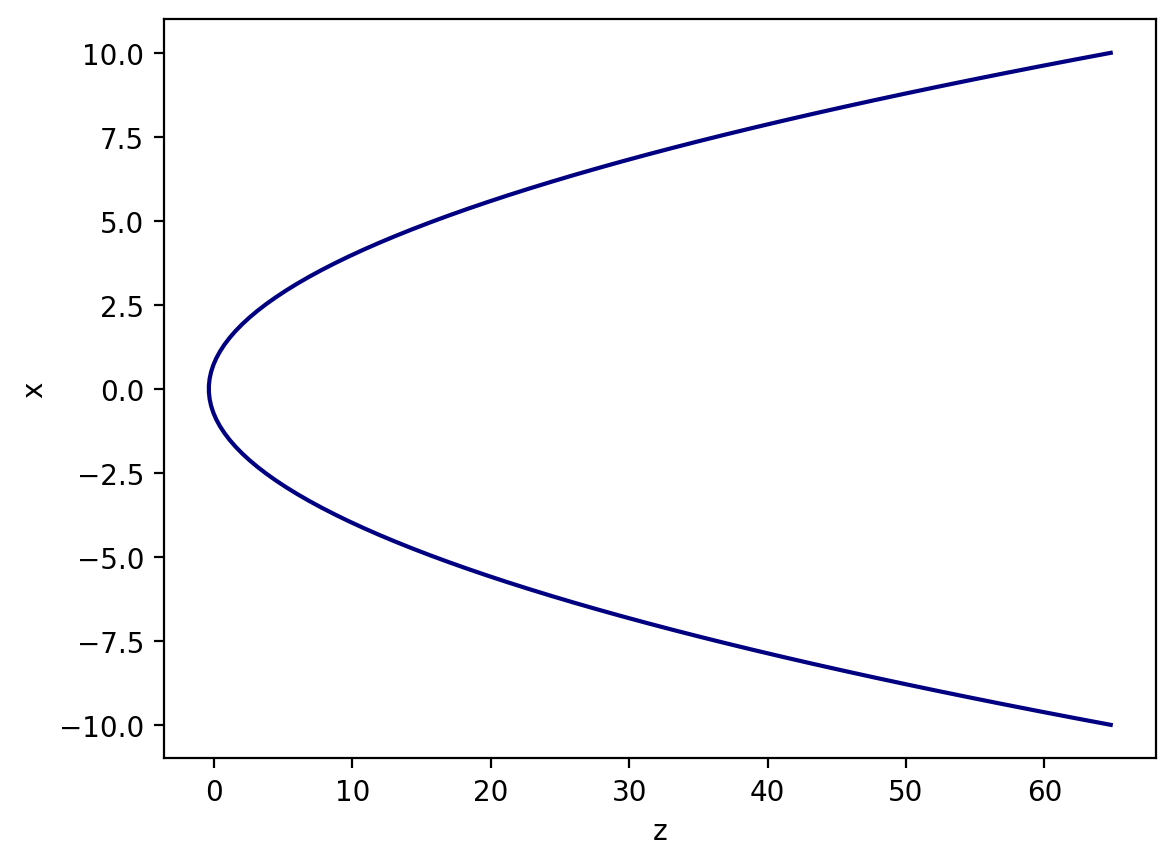

In [6]:
plt.plot(z, x, c = "navy", label = "ct=1");
plt.xlabel("z")
plt.ylabel("x")

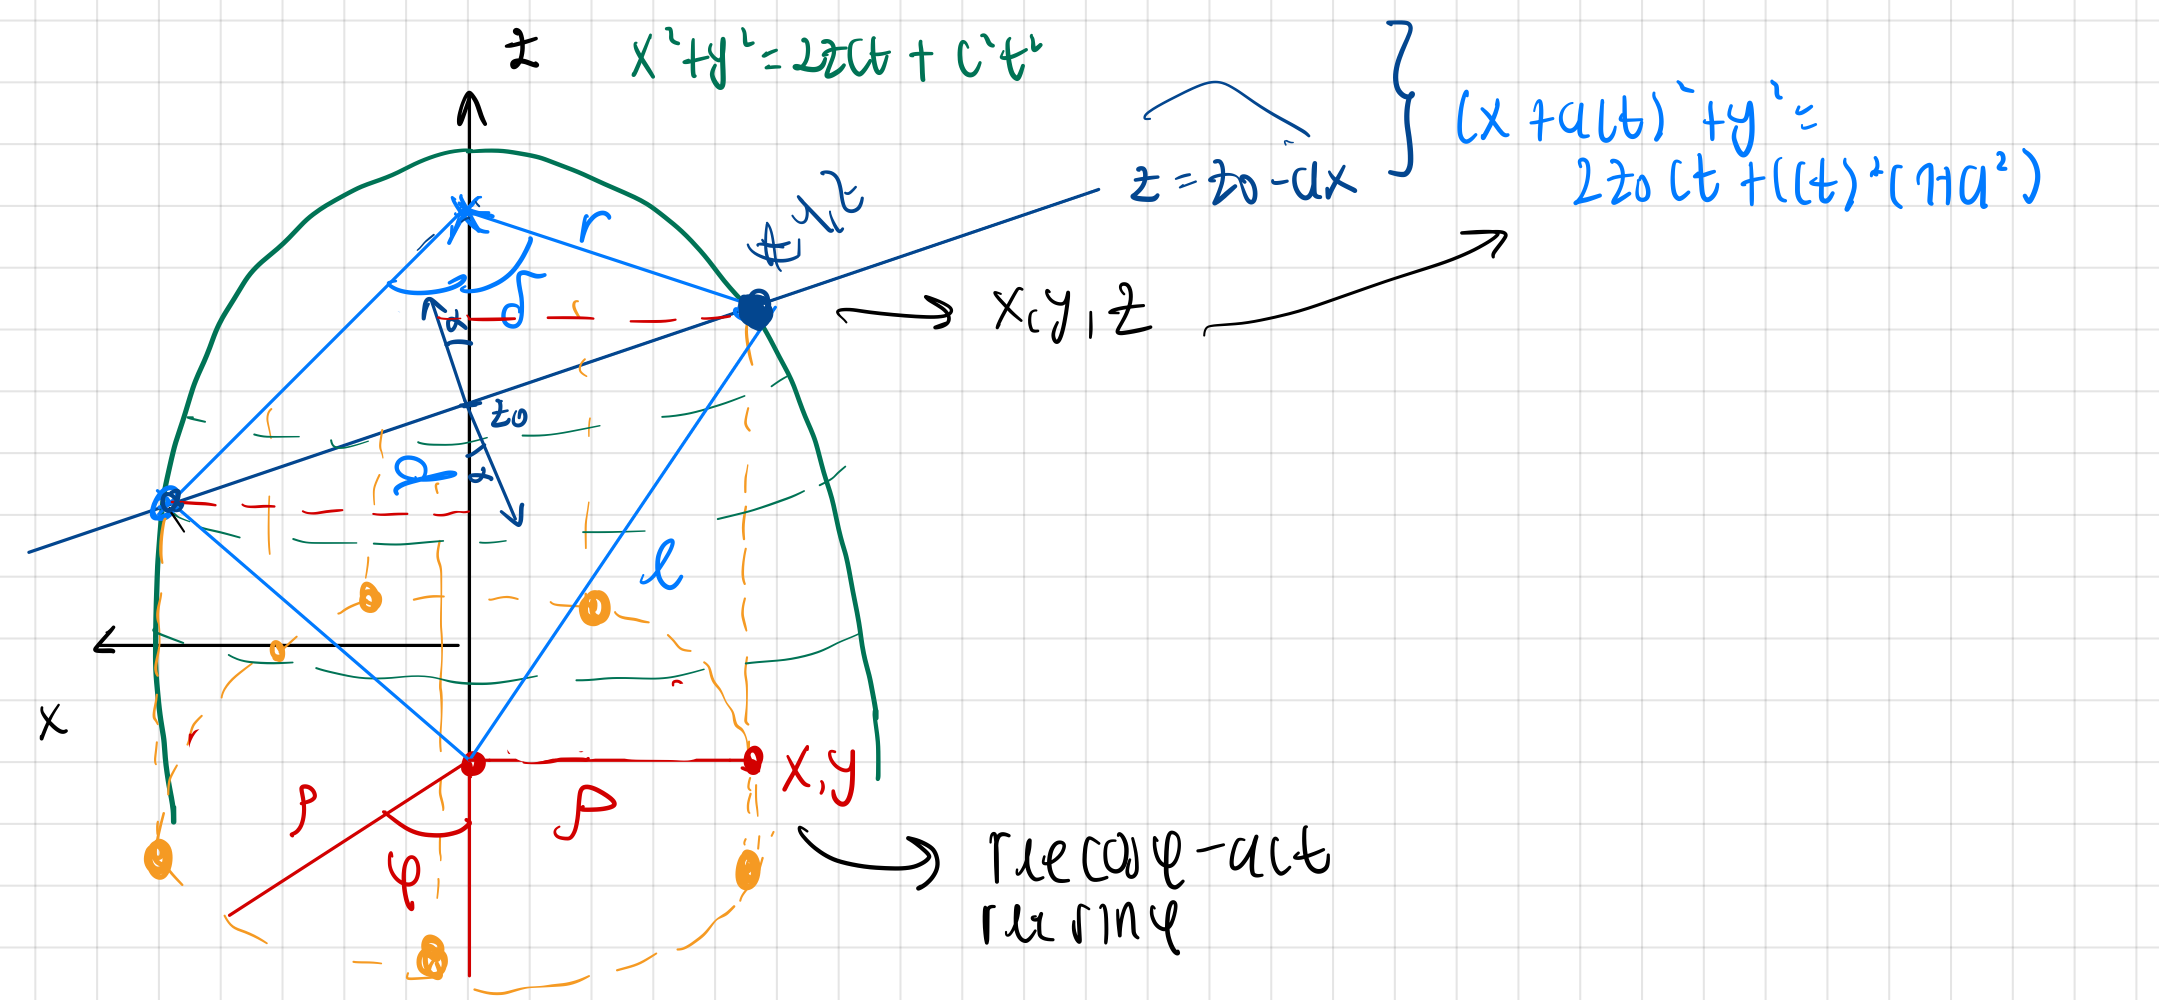

$\cos \delta = \frac{z}{\sqrt{x^2 + y^2 + z^2}}$

$r = x,y,z$: position of the dust from the focii

In [7]:
# y = 0
cos_delta = z[::10] / np.sqrt(x[::10]**2  + z[::10]**2)

In [8]:
delta_rad = np.arccos(cos_delta)
delta_deg = delta_rad * 180 / np.pi

better with tan2

In [9]:
tan2_delta = np.arctan2(x[::10], z[::10]) * 180 / np.pi

Plot the paraboloid and some x

Text(0, 0.5, 'x')

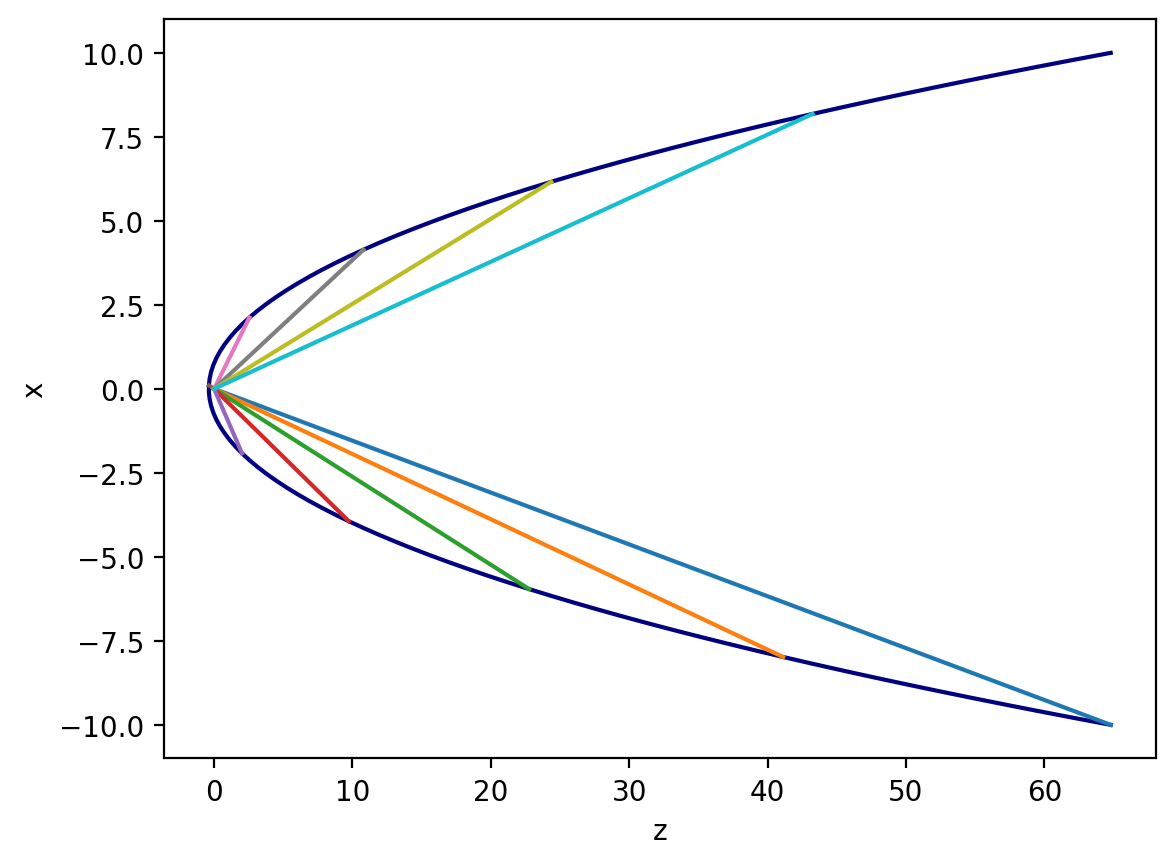

In [10]:
plt.plot(z, x, c = "navy", label = "ct=1");
plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])

plt.xlabel("z")
plt.ylabel("x")

$(x + act)^2 + y^2 = 2z_0ct + (ct)^2 (1 + a^2)$

$z = z0 - ax$

Plot the paraboloid in $y = 0$ and the plane

Text(0, 0.5, 'x')

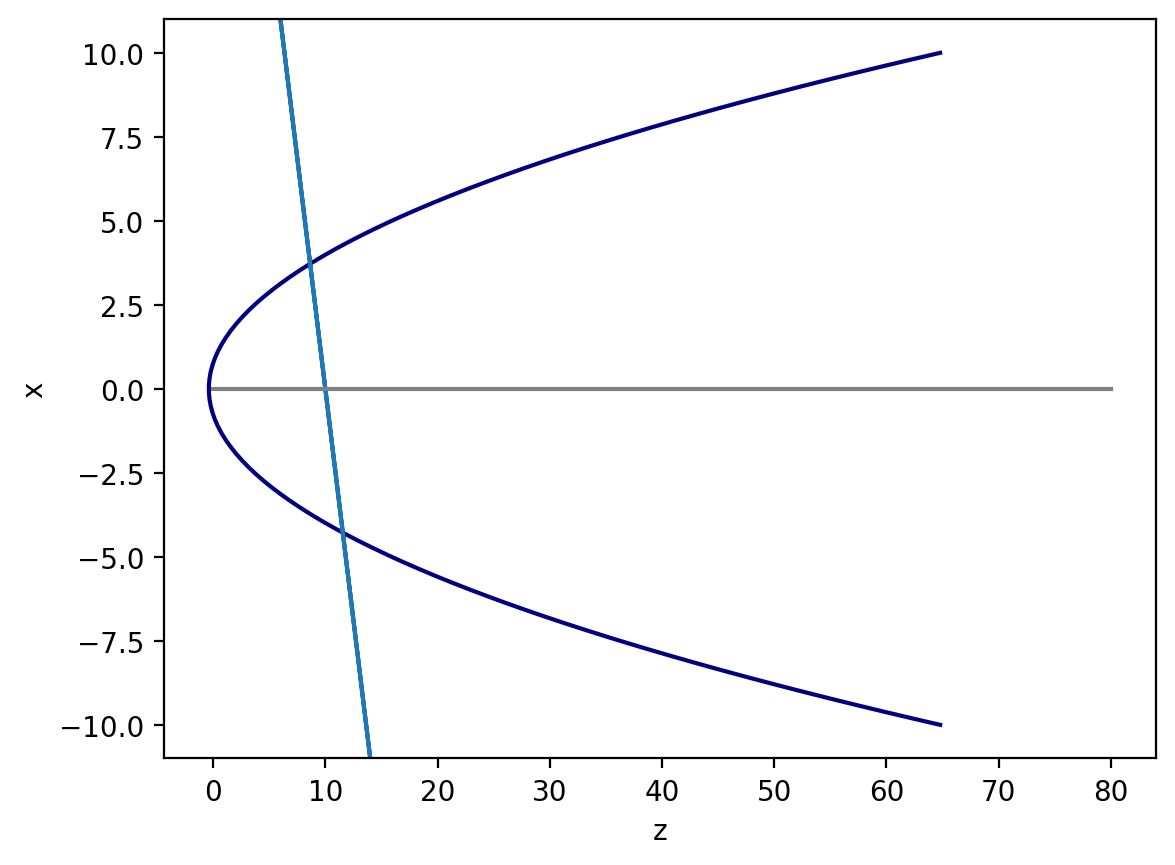

In [11]:
z0 = 10
plt.plot(z, x, c = "navy", label = "ct=1");
# plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])
plt.plot(z[::10], -(z[::10]- z0) / a)
plt.plot([0,80], [0,0], color="grey")

plt.ylim(-11,11)
plt.xlabel("z")
plt.ylabel("x")

$(x_{inter} + act)^2 + y^2 = 2z_0ct + (ct)^2(1+a^2)$

$x_{inter} = \sqrt{ 2z_0ct + (ct)^2(1+a^2) - y^2} - act $

In [12]:
# x intersection for y = 0
np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct,  -np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct,

(3.7219051867297916, -4.280326081888432)

Mark the intersection paraboloid-plane for y = 0

Text(0, 0.5, 'x')

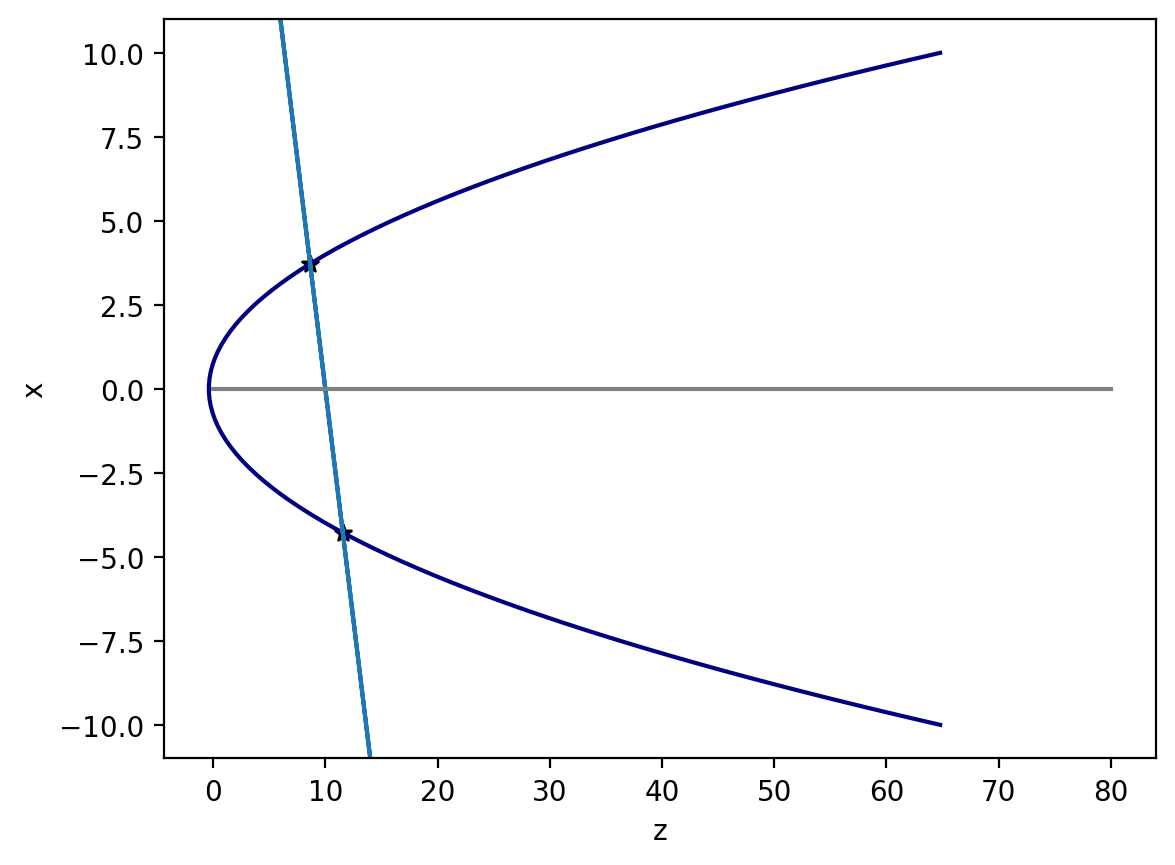

In [13]:
plt.plot(z, x, c = "navy", label = "ct=1");
# plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])
plt.plot(z[::10], -(z[::10]- z0) / a)
plt.scatter(z0 - a*(np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct), np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct, marker = "*", color = "black")
plt.scatter(z0 - a*(-np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct), -np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct, marker = "*", color = "black")

plt.plot([0,80], [0,0], color="grey")

plt.ylim(-11,11)
plt.xlabel("z")
plt.ylabel("x")

In [14]:
r_le = np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2))

$(x+act)^2 + y^2 = r_{le}^2$

In [15]:
r_le2 = 2 * z0 * ct + (ct)**2 * (1 + a**2)

The y must be between the radii of the LE, because $x_{inter} = \sqrt{ r_{le}^2 - y^2} - act $

In [16]:
y_gr = np.linspace(-r_le,r_le,800)
y_com = np.linspace(-r_le, -np.sqrt(r_le2 -  (a * ct)**2), 100)
y_com0= np.linspace(np.sqrt(r_le2 -  (a * ct)**2), r_le, 100)

y = np.concatenate((y_gr, y_com, y_com0))

x_inter = np.zeros((len(y)))
x_inter_n = np.zeros((len(y)))

for jj in range(len(y)):
  x_inter[jj] = np.sqrt(r_le2 - y[jj]**2) - a * ct
  x_inter_n[jj] = -np.sqrt(r_le2 - y[jj]**2) - a * ct

 The angle phi, and the $X$, $Y$ coordiantes in the projected plane

 $Y = r_{le} \sin \phi$

 $X = r_{le} \cos \phi - act$

 $X + act = x_{inter}$

 $\sin \phi = \frac{Y}{r_{le}}$

 $\cos \phi = \frac{X + act}{r_{le}}$

 $\tan \phi = \frac{Y}{X + act}$

(-4.680434770202276, 4.122016613250366, -4.401227197740022, 4.401227197740022)

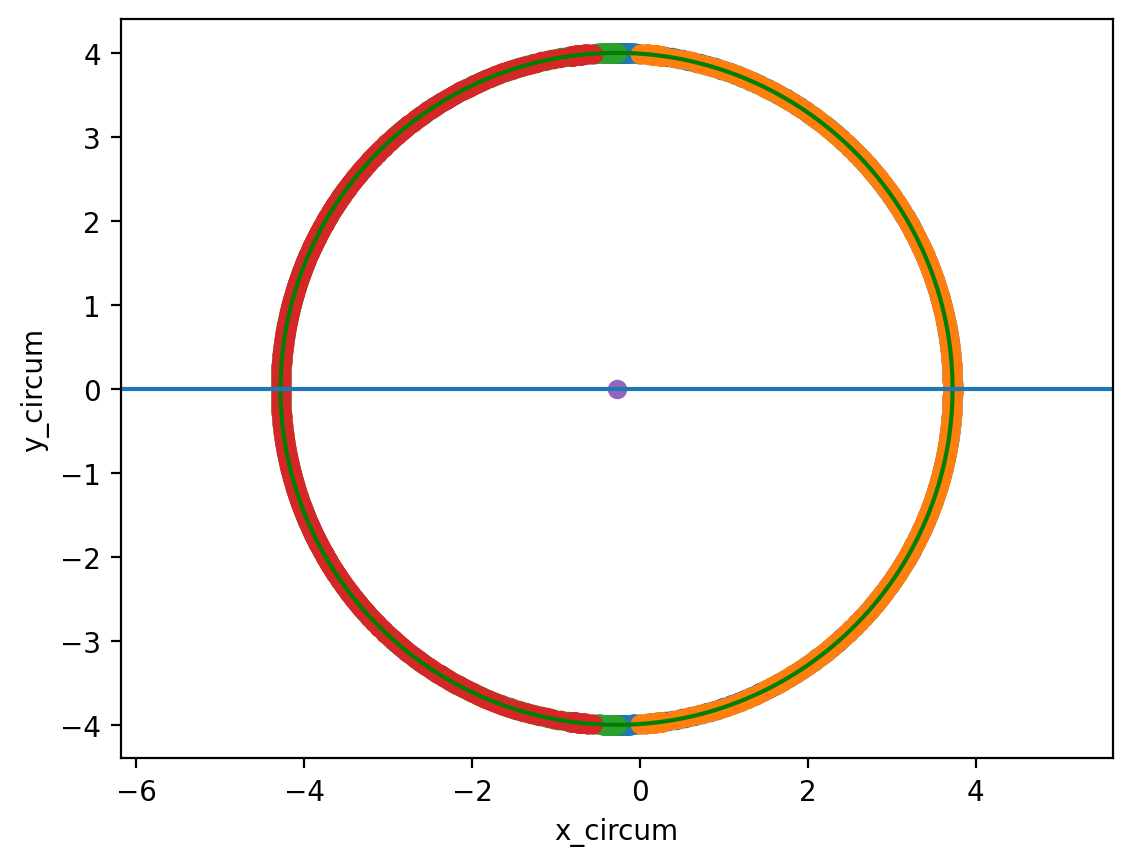

In [18]:
angle = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
plt.scatter(r_le * np.cos(np.arctan(y/x_inter)) - a * ct, r_le * np.sin(np.arctan(y/x_inter)))
plt.scatter(r_le * np.cos(np.arctan(y/x_inter_n)) - a * ct, r_le * np.sin(np.arctan(y/x_inter_n)))

plt.scatter(r_le * np.cos(-np.arctan(y/x_inter) +  np.pi) - a * ct, r_le * np.sin(-np.arctan(y/x_inter) + np.pi ))
plt.scatter(r_le * np.cos(-np.arctan(y/x_inter_n) + np.pi) - a * ct, r_le * np.sin(-np.arctan(y/x_inter_n) + np.pi ))



plt.axhline(0)
plt.scatter(-a*ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")

plt.axis('equal')

# Clean try

In [20]:
z0 = 10
ct = 280 * dtoy
r_le2 = 2 * z0 * ct + (ct)**2 * (1 + a**2)
r_le = np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2))

In [21]:
x = np.linspace(-10,10,100)
y = np.linspace(-r_le, r_le, 100)

In [22]:
z = np.zeros((len(y), len(x)))
for jj in range(len(y)):
  z[jj, :] = ( x**2 - (ct)**2 + y[jj]**2 ) / (2 * ct)

In [23]:
delta = np.arctan2(x,z[1,:])


In [24]:
x_inter = np.sqrt(r_le2 - y**2) - a * ct
x_inter_n = -1*np.sqrt(r_le2 - y**2) - a * ct


z_inter = z0 - a * x_inter
z_inter_n = z0 - a * x_inter_n

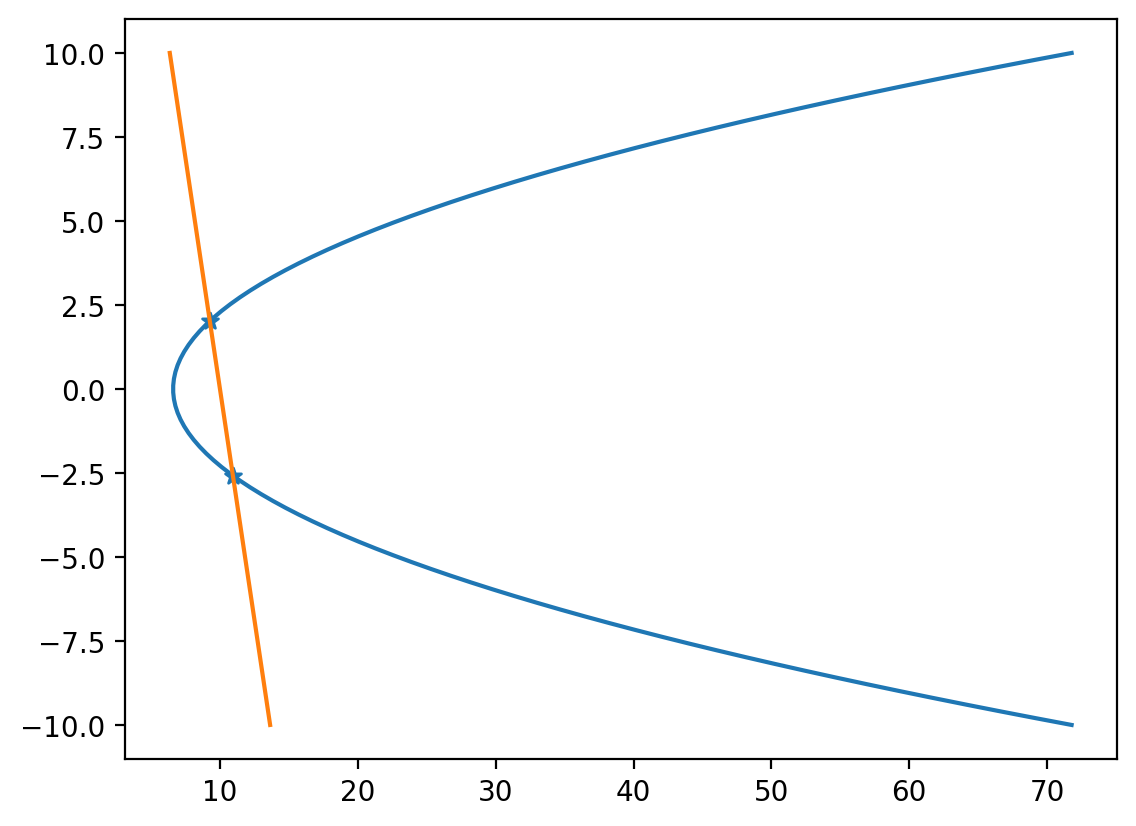

In [25]:
plt.plot(z[90,:], x)
plt.plot(z0 - a*x, x)

# plt.scatter([z_inter], [x_inter])
plt.scatter([z_inter[90], z_inter_n[90]], [x_inter[90], x_inter_n[90]], marker = "*")

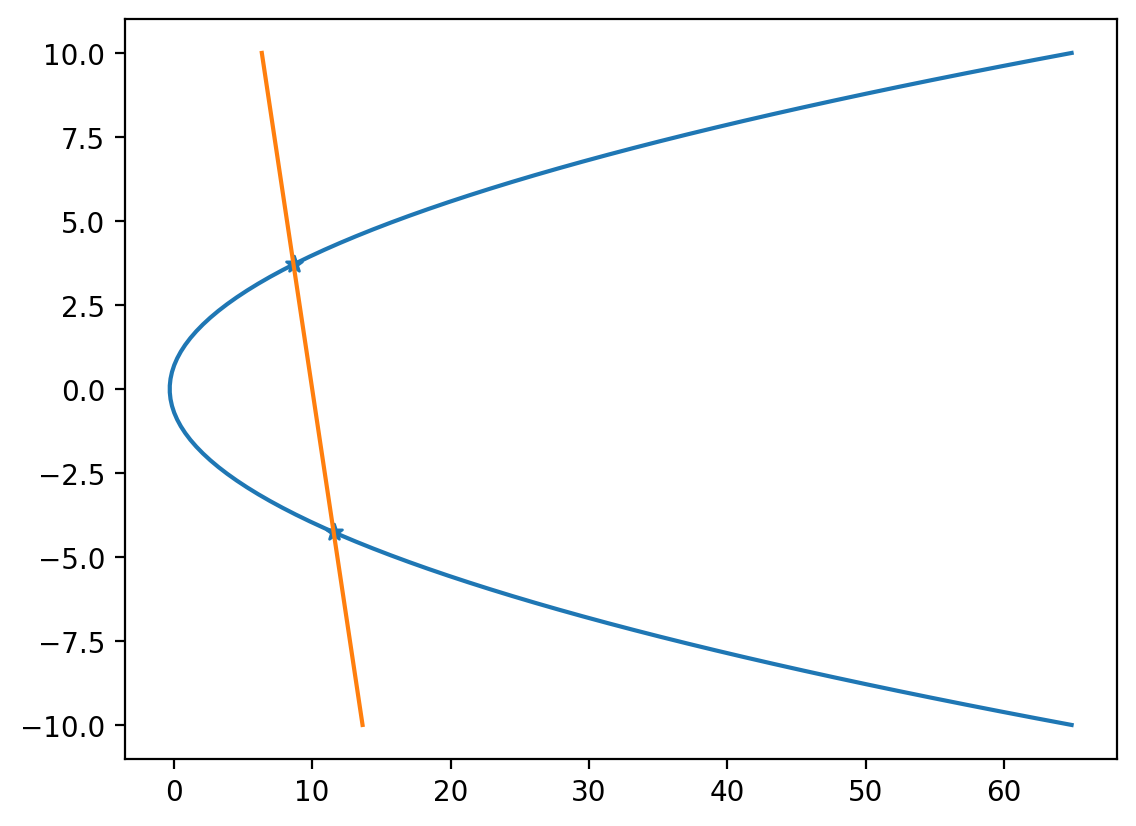

In [26]:
plt.plot(z[45,:], x)
plt.plot(z0 - a*x, x)

# plt.scatter([z_inter], [x_inter])
plt.scatter([z_inter[45], z_inter_n[45]], [x_inter[45], x_inter_n[45]], marker = "*")

In [27]:
phis = np.arctan(y / x_inter)
phis_n = np.arctan(y / x_inter_n)

(-4.680416871860335, 4.122015760948369, -4.401221757068824, 4.401221757068824)

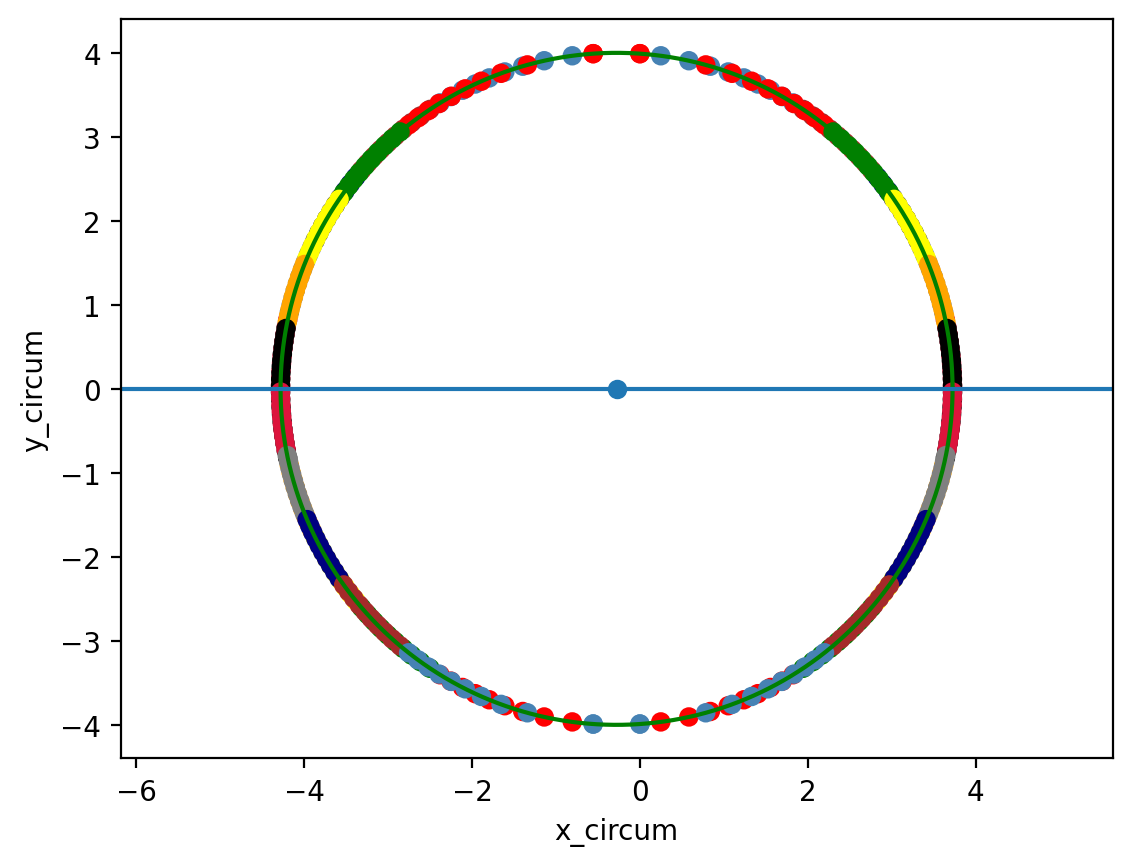

In [28]:
angle = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
color = np.repeat(np.array(["red", "green", "yellow","orange", "black", "crimson", "gray", "navy", "brown", "steelblue"]), 10)

# for aa in range(len(phis)):
plt.scatter(r_le * np.cos(phis) - a * ct, r_le * np.sin(phis), c = color)
plt.scatter(r_le * np.cos(phis_n) - a * ct, r_le * np.sin(phis_n), c = color)

plt.scatter(r_le * np.cos(-phis + np.pi) - a * ct, r_le * np.sin(-phis + np.pi ), c = color)
plt.scatter(r_le * np.cos(-phis_n + np.pi) - a * ct, r_le * np.sin(-phis_n + np.pi ), c = color)


plt.axhline(0)
plt.scatter(-a * ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")

plt.axis('equal')

# Data cube but with depende on delta

In [30]:
delta = 55
a = np.tan(np.deg2rad(50))

In [31]:
z0_test = 0.3
z0_testly = z0_test * pctoly
ct = 280 * dtoy
r_le = np.sqrt(2 * z0_testly * ct + (ct)**2 * (1 + a**2) )
r_le2 = r_le**2

x = np.linspace(-10, 10, 1000)

y_inv = ( (2 * ct * x) - ((x ** 2 - (ct)**2 ) * np.tan(np.deg2rad(delta)) )) / (np.tan(np.deg2rad(delta)))

x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct

x_inter = np.concatenate((x_inter_inv, x_inter_inv_n))
x_inter_nan_values = x_inter[~np.isnan(x_inter)]

# z_inter = z0_testly - a * x_inter_inv
# z_inter_n = z0_testly - a * x_inter_inv_n
z_inter_non = z0_testly - a * x_inter_nan_values

np.random.seed(52)
grid = np.random.uniform(0, 1, (len(x_inter_nan_values), len(z_inter_non)))
data_cube = np.zeros((len(x_inter_nan_values), len(z_inter_non), 3))

for i in range(len(x_inter_nan_values)):
    for j in range(len(z_inter_non)):
      if i == j:
        data_cube[i, i, 0] = x_inter_nan_values[i]
        data_cube[i, i, 1] = z_inter_non[i]
        data_cube[i, i, 2] = grid[i, i] * n
      else:
        data_cube[i, j, 0] = x_inter_nan_values[i]
        data_cube[i, j, 1] = z_inter_non[j]
        data_cube[i, j, 2] = 0

# angle = np.linspace(0, 2 * np.pi, 1000)
r = z_inter_non + ct

# -- rho = x^2 + y^2 = r_le
rhodrho  = (dz0 * ct) + (z_inter_non * c * dt0) + ct * dt0 * (1 + a**2)
# print(data_cube[0, 0, 2] / (r * rhodrho))
# print(data_cube[1, 1, 2] / (r * rhodrho))

surface = np.zeros(len(r))
for i in range(len(x_inter_nan_values)):
    surface[i] = Ir * data_cube[i, i, 2] * dz0 / ( 4 * np.pi * r[i] * rhodrho[i] )


phis = np.arctan(y_inv[~np.isnan(x_inter_inv)] /x_inter_inv[~np.isnan(x_inter_inv)])
phis_n = np.arctan(y_inv[~np.isnan(x_inter_inv_n)] /x_inter_inv_n[~np.isnan(x_inter_inv_n)])


half_obs_thickness = np.sqrt( (ct / r_le) ** 2 * dz0 ** 2 + ( (r_le * c / 2 * ct) + ( c * ct / 2 * r_le )) ** 2 * dt0  ** 2 ) / 2
# -- include the thickness in xy plane
r_le_out= r_le + half_obs_thickness
# -- in arcseconds 5kpc = 16308 ly
# -- degree to arcseconds
r_le_out = np.arctan(r_le_out / d) * (180 / np.pi) * 3600
r_le_in = r_le - half_obs_thickness
r_le_in = np.arctan(r_le_in / d) * (180 / np.pi) * 3600



act = np.arctan(a * ct / d) * (180 / np.pi) * 3600

radii_p = [r_le_out, r_le_in]
xs_p = np.outer(radii_p, np.cos(phis)) - act
ys_p = np.outer(radii_p, np.sin(phis))
# xs_p[1,:] = xs_p[1,::-1]
# ys_p[1,:] = ys_p[1,::-1]

xs_n = np.outer(radii_p, np.cos(phis_n)) - act
ys_n = np.outer(radii_p, np.sin(phis_n))
# xs_n[1,:] = xs_n[1,::-1]
# ys_n[1,:] = ys_n[1,::-1]

new_xs = np.concatenate((xs_p, xs_n), axis=1).reshape(1,2,len(r))
new_ys = np.concatenate((ys_p, ys_n), axis=1).reshape(1,2,len(r))


# ----- other half
xs_p_h = np.outer(radii_p, np.cos(-phis + np.pi)) - act
ys_p_h = np.outer(radii_p, np.sin(-phis + np.pi))
# xs_p[1,:] = xs_p[1,::-1]
# ys_p[1,:] = ys_p[1,::-1]

xs_n_h = np.outer(radii_p, np.cos(-phis_n + np.pi)) - act
ys_n_h = np.outer(radii_p, np.sin(-phis_n + np.pi))
# xs_n[1,:] = xs_n[1,::-1]
# ys_n[1,:] = ys_n[1,::-1]

new_xs_h = np.concatenate((xs_p_h, xs_n_h), axis=1).reshape(1,2,len(r))
new_ys_h = np.concatenate((ys_p_h, ys_n_h), axis=1).reshape(1,2,len(r))


<ipython-input-31-d57d55426370>:11: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-31-d57d55426370>:12: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


In [32]:
surface.shape

(322,)

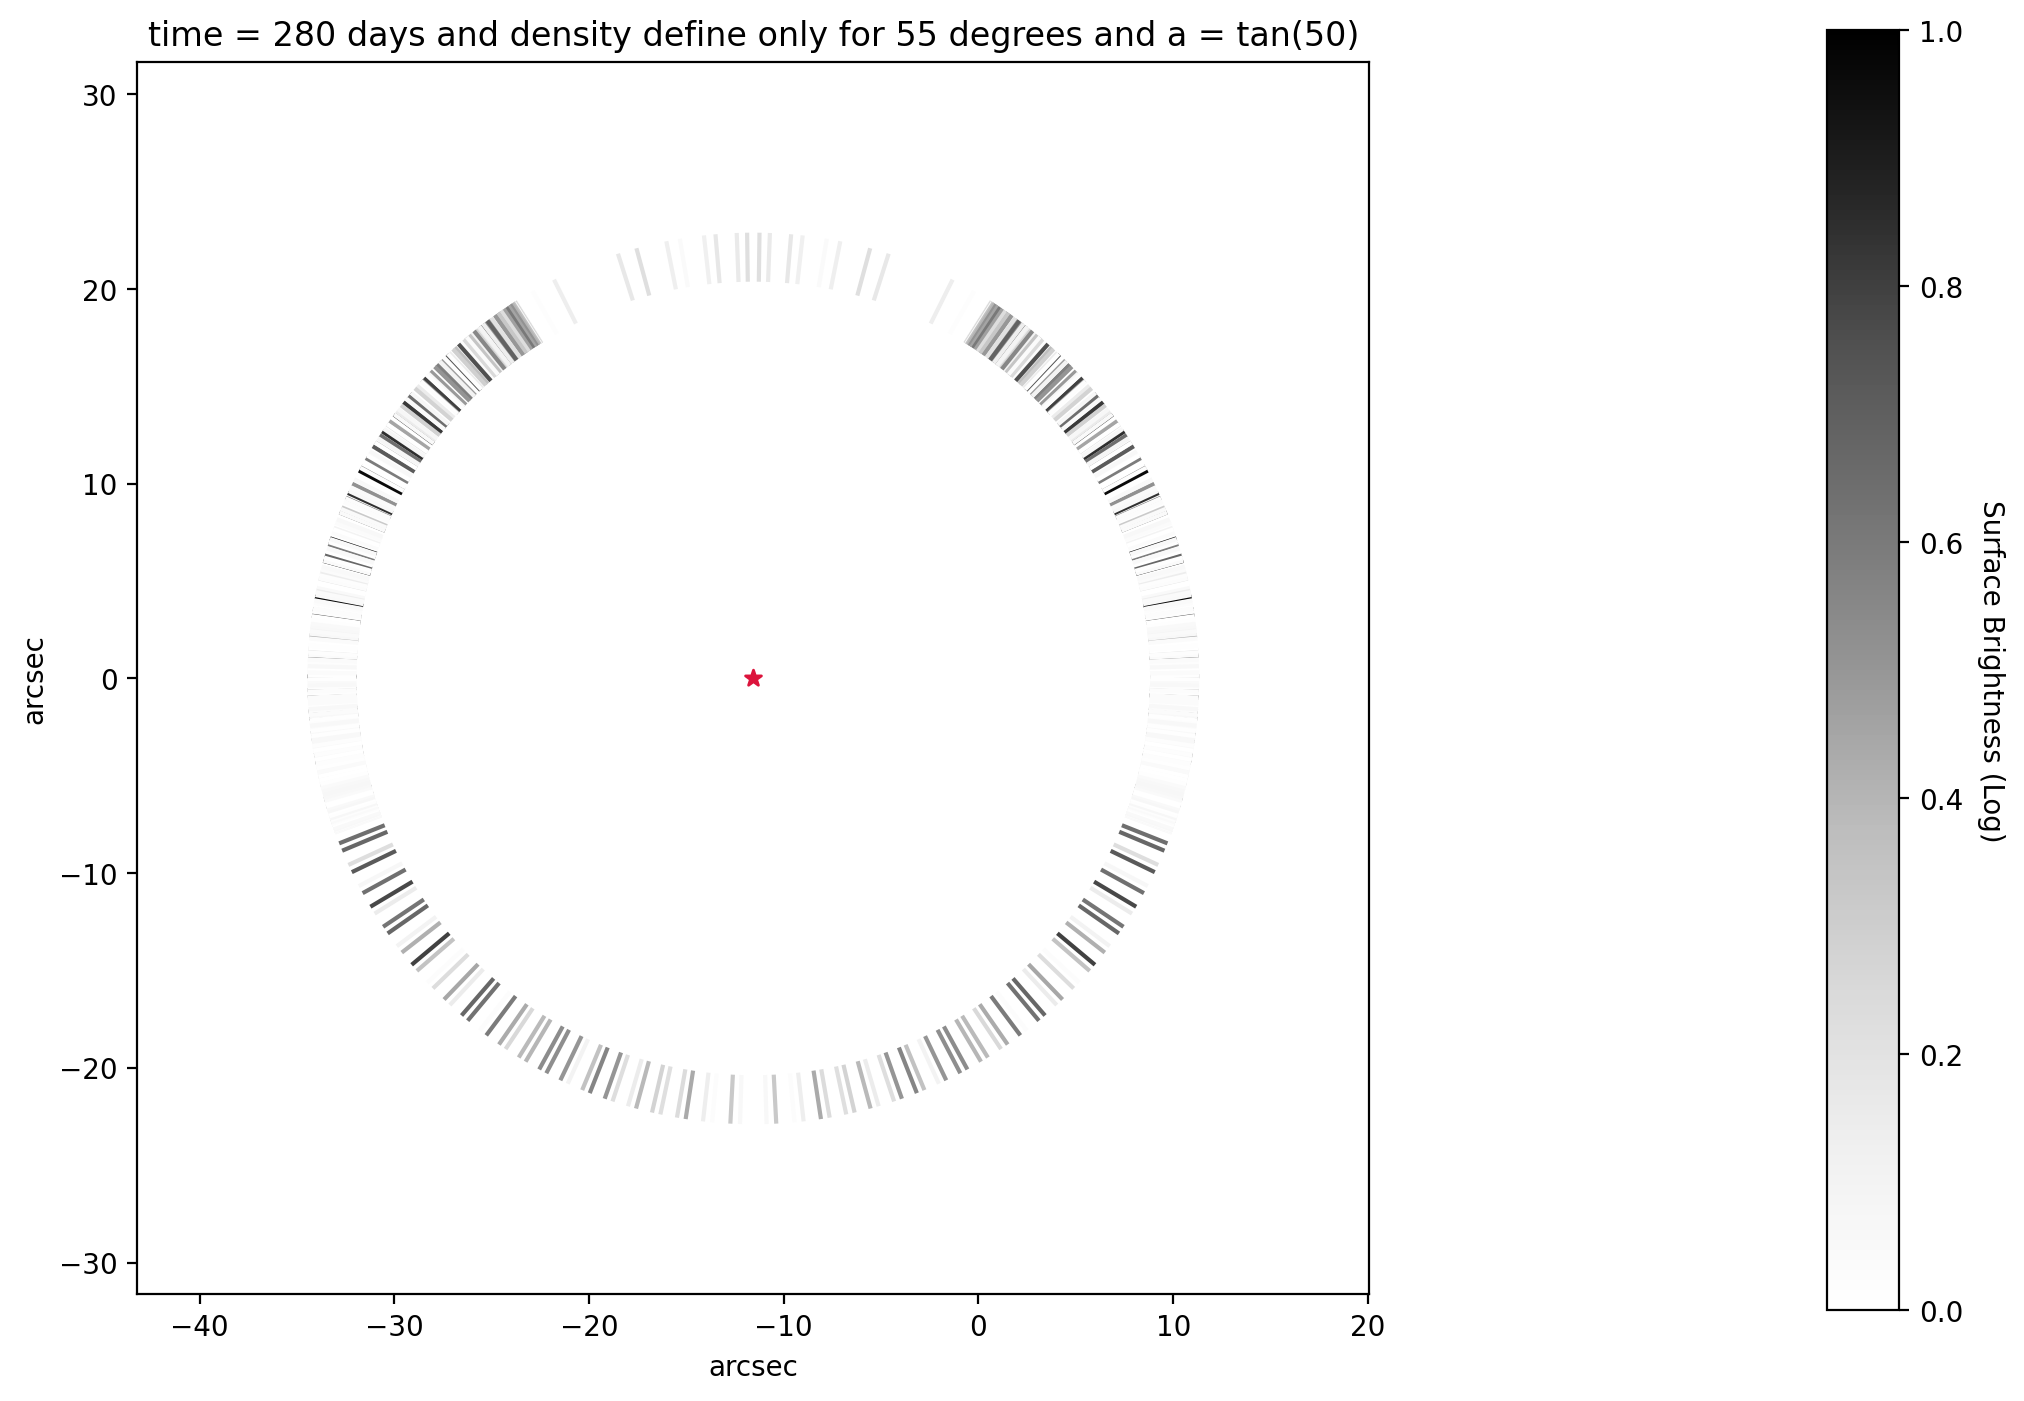

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))

ax.set_title("time = %s days and density define only for %s degrees and a = tan(%s)"%(int(ct / dtoy), int(delta), int(np.rad2deg(np.arctan(a)))))
cmap = matplotlib.colormaps.get_cmap('Greys')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))
limit_max = np.max([max(np.ravel(new_xs)), max(np.ravel(new_ys))])
limit_min = np.min([min(np.ravel(new_xs)), min(np.ravel(new_ys))])

r_le_arc = np.arctan(r_le / d) * (180 / np.pi) * 3600
ax.set_xlim(-act - r_le_arc - 10, -act + r_le_arc + 10)
ax.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(r)):
  ax.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
ax.scatter(- act, 0, marker = "*", color = "crimson")


cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
plt.show()
